<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/Sales_Data_Pivots_CrossTabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm

#Get Data

In [1]:
#Data from https://www.ibm.com/communities/analytics/watson-analytics-blog/sales-products-sample-data/
#!wget https://community.watsonanalytics.com/wp-content/uploads/2015/08/WA_Sales_Products_2012-14.csv

#Alternatively, download to local machine from https://drive.google.com/open?id=1UUw7yrsA3NhL_jJVPMK0_wyqfDt8rshZ
#and upload to colab
#!gdown https://drive.google.com/uc?id=1UUw7yrsA3NhL_jJVPMK0_wyqfDt8rshZ  -O WA_Sales_Products_2012-14.csv
!wget -O WA_Sales_Products_2012-14.csv -q https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/WA_Sales_Products_2012-14.csv

In [2]:
!ls

sample_data  WA_Sales_Products_2012-14.csv


In [3]:
import pandas as pd

In [4]:
bigData_df = pd.read_csv("WA_Sales_Products_2012-14.csv")
bigData_df.head(5)

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,Q1 2012,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,Q1 2012,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,Q1 2012,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,Q1 2012,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,Q1 2012,119822.20,1415,0.291450


In [5]:
bigData_df.shape

(88475, 11)

In [6]:
bigData_df.groupby('Quarter').sum()[['Revenue','Quantity','Gross margin']]

<ipython-input-6-3f489265ce19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bigData_df.groupby('Quarter').sum()[['Revenue','Quantity','Gross margin']]


,Revenue,Quantity,Gross margin
Quarter,,,
Q1 2012,2.932285e+08,6258427,3838.573018
Q1 2013,3.441243e+08,6094787,3749.258500
Q1 2014,4.716244e+08,8382882,3693.094702
Q2 2012,2.781808e+08,5579643,3877.824326
Q2 2013,3.918745e+08,6783135,3748.728679
Q2 2014,4.792699e+08,8344594,3642.672214
Q3 2012,2.810797e+08,5556853,3822.985560
Q3 2013,3.781180e+08,6467989,3864.456941
Q3 2014,1.664420e+08,2868410,2146.388895


#Modify Data<br>
Make it sortable by quarter

In [7]:
# one way to flip a string
#def flipQA(s):
#    p1 = s[:2]
#    p2 = s[3:]
#    #print(p1,p2)
#    return(p2+p1)

# another way to flip a string
def flipQB(s1):
    p = s1.split()
    return(p[1]+p[0])

In [8]:
#flipQ('Q1 2012')
print((flipQB('ab cdef')))
#print(type(flipQ2('ab cdef')))

cdefab


In [9]:
flipQB('Q1 2012')

'2012Q1'

In [10]:
#bigData_df['Quarter'] = bigData_df['Quarter'].apply(flipQ2)
bigData_df.Quarter = bigData_df.Quarter.apply(flipQB)
bigData_df.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,2012Q1,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,2012Q1,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,2012Q1,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,2012Q1,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,2012Q1,119822.20,1415,0.291450


In [11]:
bigData_df

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012,2012Q1,59628.66,489,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012,2012Q1,35950.32,252,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012,2012Q1,89940.48,147,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012,2012Q1,165883.41,303,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012,2012Q1,119822.20,1415,0.291450
...,...,...,...,...,...,...,...,...,...,...,...
88470,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Rope,Husky Rope 60,2014,2014Q3,30865.50,171,0.299114
88471,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Climbing Accessories,Firefly Climbing Lamp,2014,2014Q3,7485.29,191,0.446287
88472,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Climbing Accessories,Firefly Charger,2014,2014Q3,12255.48,236,0.569420
88473,Spain,Sales visit,Outdoors Shop,Mountaineering Equipment,Tools,Granite Axe,2014,2014Q3,56448.00,1470,0.491667


#Focus on few columns of data

In [12]:
bigData_df[['Product line', 'Quarter','Revenue','Quantity','Gross margin']]

,Product line,Quarter,Revenue,Quantity,Gross margin
0,Camping Equipment,2012Q1,59628.66,489,0.347548
1,Camping Equipment,2012Q1,35950.32,252,0.474274
2,Camping Equipment,2012Q1,89940.48,147,0.352772
3,Camping Equipment,2012Q1,165883.41,303,0.282938
4,Camping Equipment,2012Q1,119822.20,1415,0.291450
...,...,...,...,...,...
88470,Mountaineering Equipment,2014Q3,30865.50,171,0.299114
88471,Mountaineering Equipment,2014Q3,7485.29,191,0.446287
88472,Mountaineering Equipment,2014Q3,12255.48,236,0.569420
88473,Mountaineering Equipment,2014Q3,56448.00,1470,0.491667


In [13]:
ProdLine_df = bigData_df[['Product line', 'Quarter','Revenue','Quantity','Gross margin']].copy()
ProdLine_df.head()

,Product line,Quarter,Revenue,Quantity,Gross margin
0,Camping Equipment,2012Q1,59628.66,489,0.347548
1,Camping Equipment,2012Q1,35950.32,252,0.474274
2,Camping Equipment,2012Q1,89940.48,147,0.352772
3,Camping Equipment,2012Q1,165883.41,303,0.282938
4,Camping Equipment,2012Q1,119822.20,1415,0.291450


#Quarterly Data Analysis

In [14]:
Quarterly_df = bigData_df[['Quarter','Revenue','Quantity','Gross margin']].groupby('Quarter').sum()
Quarterly_df

,Revenue,Quantity,Gross margin
Quarter,,,
2012Q1,2.932285e+08,6258427,3838.573018
2012Q2,2.781808e+08,5579643,3877.824326
2012Q3,2.810797e+08,5556853,3822.985560
2012Q4,3.067067e+08,6129762,3577.653706
2013Q1,3.441243e+08,6094787,3749.258500
2013Q2,3.918745e+08,6783135,3748.728679
2013Q3,3.781180e+08,6467989,3864.456941
2013Q4,3.817744e+08,6595879,3565.850830
2014Q1,4.716244e+08,8382882,3693.094702


<Axes: xlabel='Quarter'>

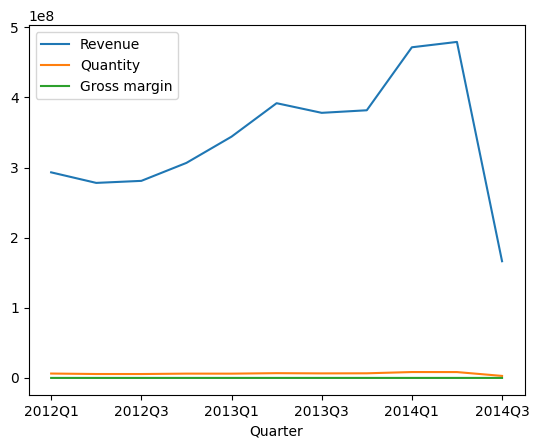

In [15]:
Quarterly_df.plot()

<Axes: xlabel='Quarter'>

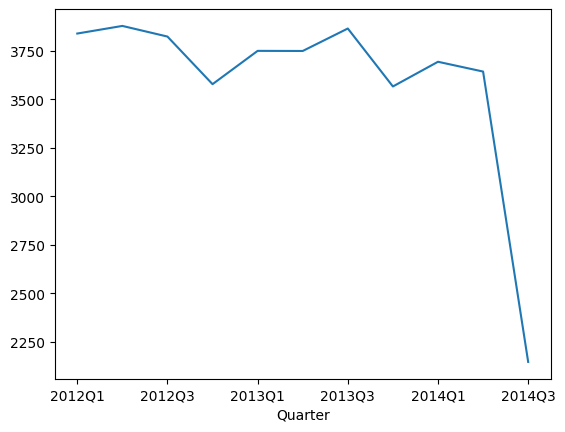

In [16]:
# https://stackoverflow.com/questions/41825939/plot-pandas-dataframe-two-columns-from
Quarterly_df['Gross margin'].plot()

<Axes: xlabel='Quarter'>

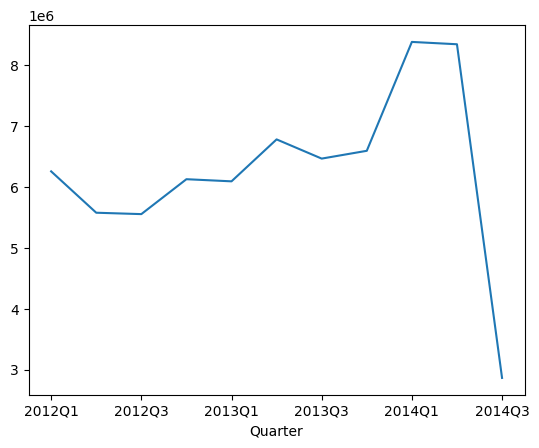

In [17]:
Quarterly_df['Quantity'].plot()

<Axes: xlabel='Quarter'>

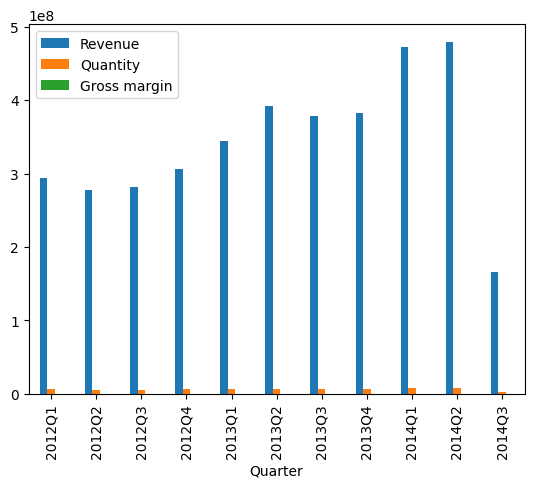

In [18]:
Quarterly_df.plot.bar()

<Axes: xlabel='Quarter'>

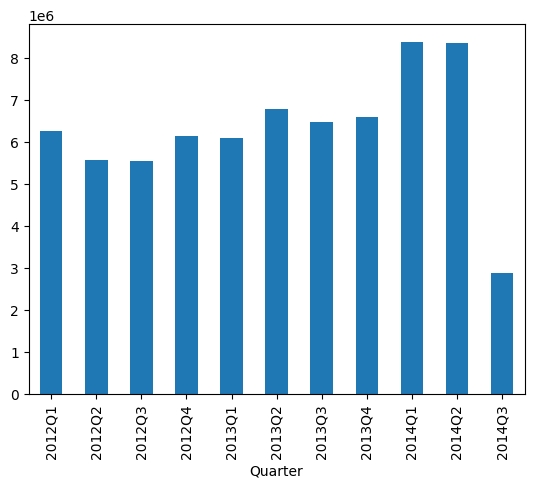

In [19]:
Quarterly_df['Quantity'].plot.bar()

#Data by Product Line

In [20]:
ProductLine_df = bigData_df[['Product line','Revenue','Quantity','Gross margin']].groupby('Product line').sum()
ProductLine_df

,Revenue,Quantity,Gross margin
Product line,,,
Camping Equipment,1.256050e+09,21406096,10276.473891
Golf Equipment,5.728575e+08,4020719,3979.181306
Mountaineering Equipment,4.096601e+08,9900091,3325.374480
Outdoor Protection,3.982878e+07,6400089,5066.421043
Personal Accessories,1.494026e+09,27335366,16880.036650


<Axes: xlabel='Product line'>

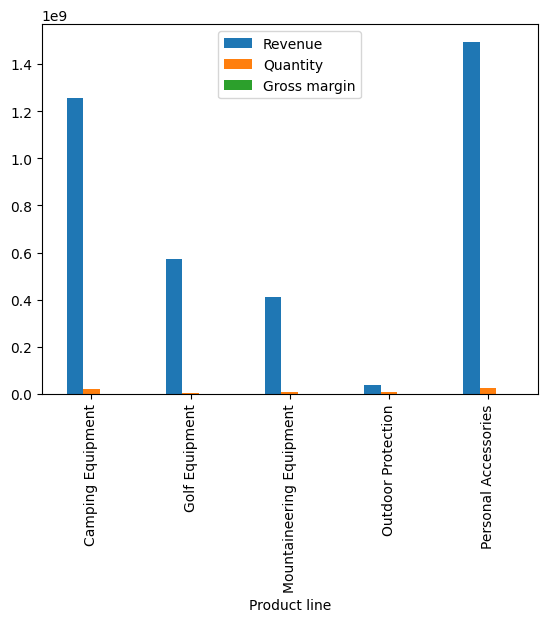

In [21]:
ProductLine_df.plot.bar()
#ProductLine_df.plot(type=bar)

<Axes: ylabel='Product line'>

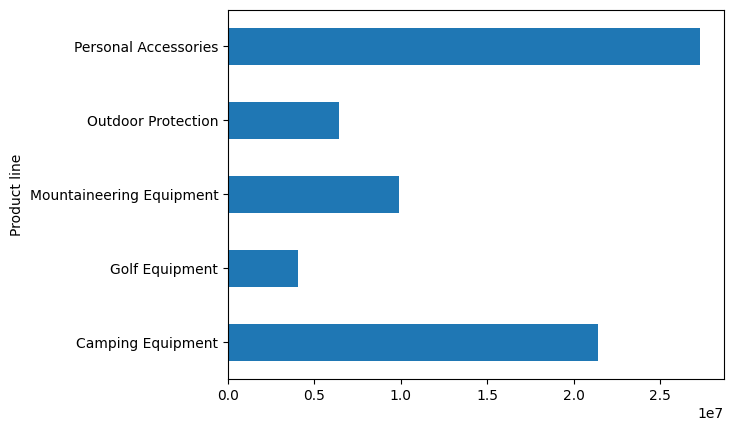

In [22]:
ProductLine_df['Quantity'].plot.barh()

<Axes: xlabel='Product line'>

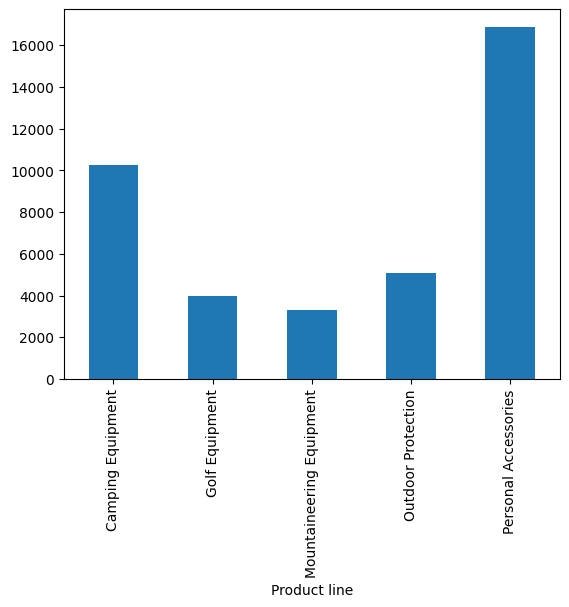

In [23]:
ProductLine_df['Gross margin'].plot.bar()

<Axes: xlabel='Product line'>

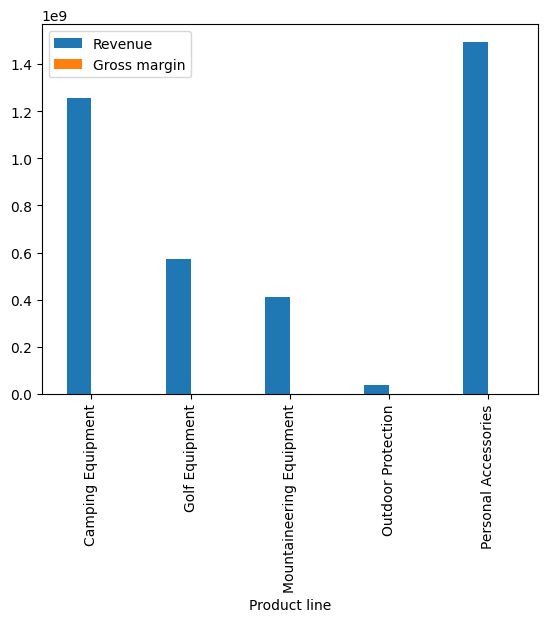

In [24]:
ProductLine_df[['Revenue','Gross margin']].plot.bar()

#Pivot the Data<br>
https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [25]:
PQR_df = bigData_df[['Product line', 'Quarter','Revenue']].copy()
PQR_df.rename(columns = {'Product line':'Product'}, inplace = True)
PQR_df.head()

,Product,Quarter,Revenue
0,Camping Equipment,2012Q1,59628.66
1,Camping Equipment,2012Q1,35950.32
2,Camping Equipment,2012Q1,89940.48
3,Camping Equipment,2012Q1,165883.41
4,Camping Equipment,2012Q1,119822.20


In [26]:
pd.pivot_table(PQR_df,index=["Quarter"],aggfunc='sum')  # aggfunc parameter, if not supplied, default is 'mean'
#pd.crosstab(PQR_df.Product, PQR_df.Quarter)


<ipython-input-26-ef6b77fbdd4c>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(PQR_df,index=["Quarter"],aggfunc='sum')  # aggfunc parameter, if not supplied, default is 'mean'


,Revenue
Quarter,
2012Q1,2.932285e+08
2012Q2,2.781808e+08
2012Q3,2.810797e+08
2012Q4,3.067067e+08
2013Q1,3.441243e+08
2013Q2,3.918745e+08
2013Q3,3.781180e+08
2013Q4,3.817744e+08
2014Q1,4.716244e+08


In [27]:
PQR_pivot = pd.pivot_table(PQR_df,index=["Quarter", 'Product'], aggfunc='sum')  # aggfunc parameter, if not supplied, default is 'mean'
PQR_pivot

Revenue
Quarter Product                               
2012Q1  Camping Equipment         1.013010e+08
        Golf Equipment            4.558543e+07
        Mountaineering Equipment  2.739236e+07
        Outdoor Protection        6.405575e+06
        Personal Accessories      1.125441e+08
2012Q2  Camping Equipment         9.818577e+07
        Golf Equipment            3.879949e+07
        Mountaineering Equipment  2.543584e+07
        Outdoor Protection        5.901885e+06
        Personal Accessories      1.098578e+08
2012Q3  Camping Equipment         9.771828e+07
        Golf Equipment            3.908074e+07
        Mountaineering Equipment  2.554270e+07
        Outdoor Protection        5.983942e+06
        Personal Accessories      1.127540e+08
2012Q4  Camping Equipment         1.055525e+08
        Golf Equipment            4.454078e+07
        Mountaineering Equipment  2.872876e+07
        Outdoor Protection        6.717172e+06
        Personal Accessories      1.211675e+08
2013Q1  Camping Equipment         1.158505e+08
        Golf Equipment            5.761287e+07
        Mountaineering Equipment  3.653974e+07
        Outdoor Protection        2.401248e+06
        Personal Accessories      1.317199e+08
2013Q2  Camping Equipment         1.314520e+08
        Golf Equipment            6.197051e+07
        Mountaineering Equipment  4.268432e+07
        Outdoor Protection        2.631337e+06
        Personal Accessories      1.531363e+08
2013Q3  Camping Equipment         1.307498e+08
        Golf Equipment            5.604071e+07
        Mountaineering Equipment  4.144434e+07
        Outdoor Protection        2.621653e+06
        Personal Accessories      1.472615e+08
2013Q4  Camping Equipment         1.223301e+08
        Golf Equipment            5.448618e+07
        Mountaineering Equipment  4.037143e+07
        Outdoor Protection        2.694937e+06
        Personal Accessories      1.618917e+08
2014Q1  Camping Equipment         1.455001e+08
        Golf Equipment            8.052879e+07
        Mountaineering Equipment  5.976898e+07
        Outdoor Protection        1.877667e+06
        Personal Accessories      1.839488e+08
2014Q2  Camping Equipment         1.534709e+08
        Golf Equipment            6.908228e+07
        Mountaineering Equipment  6.011715e+07
        Outdoor Protection        1.886438e+06
        Personal Accessories      1.947132e+08
2014Q3  Camping Equipment         5.393928e+07
        Golf Equipment            2.512975e+07
        Mountaineering Equipment  2.163452e+07
        Outdoor Protection        7.069202e+05
        Personal Accessories      6.503151e+07

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
PQR_pivot = pd.pivot_table(PQR_df,index=["Quarter", 'Product'], aggfunc='sum')  # aggfunc parameter, if not supplied, default is 'mean'
PQR_pivot

Revenue
Quarter Product                              
2012Q1  Camping Equipment        101300991.84
        Golf Equipment            45585426.86
        Mountaineering Equipment  27392359.63
        Outdoor Protection         6405575.14
        Personal Accessories     112544107.06
2012Q2  Camping Equipment         98185771.79
        Golf Equipment            38799485.25
        Mountaineering Equipment  25435839.35
        Outdoor Protection         5901884.72
        Personal Accessories     109857778.85
2012Q3  Camping Equipment         97718279.62
        Golf Equipment            39080737.47
        Mountaineering Equipment  25542699.11
        Outdoor Protection         5983942.21
        Personal Accessories     112754008.54
2012Q4  Camping Equipment        105552529.92
        Golf Equipment            44540777.49
        Mountaineering Equipment  28728761.85
        Outdoor Protection         6717172.01
        Personal Accessories     121167461.45
2013Q1  Camping Equipment        115850547.01
        Golf Equipment            57612872.82
        Mountaineering Equipment  36539741.14
        Outdoor Protection         2401247.98
        Personal Accessories     131719858.12
2013Q2  Camping Equipment        131451955.62
        Golf Equipment            61970505.15
        Mountaineering Equipment  42684317.46
        Outdoor Protection         2631337.40
        Personal Accessories     153136346.88
2013Q3  Camping Equipment        130749800.24
        Golf Equipment            56040710.42
        Mountaineering Equipment  41444335.89
        Outdoor Protection         2621653.16
        Personal Accessories     147261512.83
2013Q4  Camping Equipment        122330119.96
        Golf Equipment            54486182.16
        Mountaineering Equipment  40371428.77
        Outdoor Protection         2694937.30
        Personal Accessories     161891690.59
2014Q1  Camping Equipment        145500143.06
        Golf Equipment            80528789.54
        Mountaineering Equipment  59768978.06
        Outdoor Protection         1877666.79
        Personal Accessories     183948790.24
2014Q2  Camping Equipment        153470902.51
        Golf Equipment            69082281.61
        Mountaineering Equipment  60117148.81
        Outdoor Protection         1886438.31
        Personal Accessories     194713152.58
2014Q3  Camping Equipment         53939284.40
        Golf Equipment            25129748.14
        Mountaineering Equipment  21634522.83
        Outdoor Protection          706920.16
        Personal Accessories      65031507.03

https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

In [30]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # use Seaborn styles

In [31]:
PQR_pivot1 = pd.pivot_table(PQR_df,'Revenue',index="Quarter",columns='Product',aggfunc='sum')
#PQR_pivot = pd.crosstab(PQR_df.Quarter,PQR_df.Product)
PQR_pivot1

Product,Camping Equipment,Golf Equipment,Mountaineering Equipment,Outdoor Protection,Personal Accessories
Quarter,,,,,
2012Q1,101300991.84,45585426.86,27392359.63,6405575.14,112544107.06
2012Q2,98185771.79,38799485.25,25435839.35,5901884.72,109857778.85
2012Q3,97718279.62,39080737.47,25542699.11,5983942.21,112754008.54
2012Q4,105552529.92,44540777.49,28728761.85,6717172.01,121167461.45
2013Q1,115850547.01,57612872.82,36539741.14,2401247.98,131719858.12
2013Q2,131451955.62,61970505.15,42684317.46,2631337.40,153136346.88
2013Q3,130749800.24,56040710.42,41444335.89,2621653.16,147261512.83
2013Q4,122330119.96,54486182.16,40371428.77,2694937.30,161891690.59
2014Q1,145500143.06,80528789.54,59768978.06,1877666.79,183948790.24


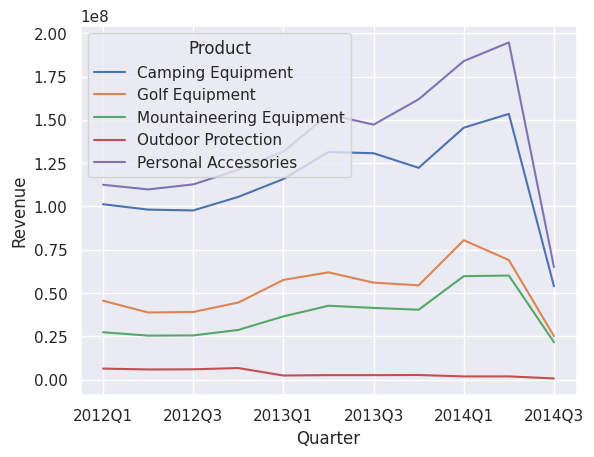

In [32]:
PQR_pivot1.plot()
plt.ylabel('Revenue');

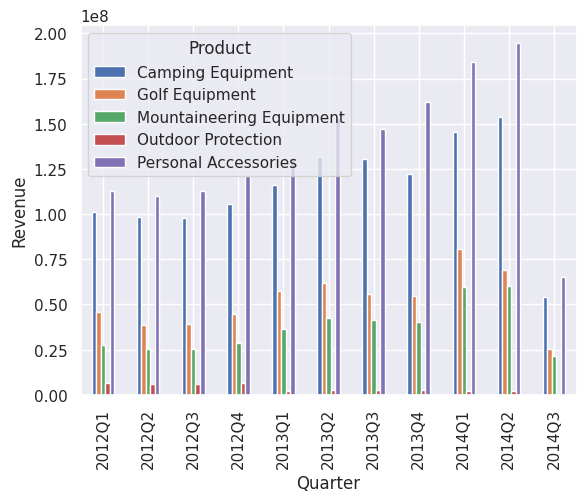

In [33]:
PQR_pivot1.plot.bar()
plt.ylabel('Revenue');

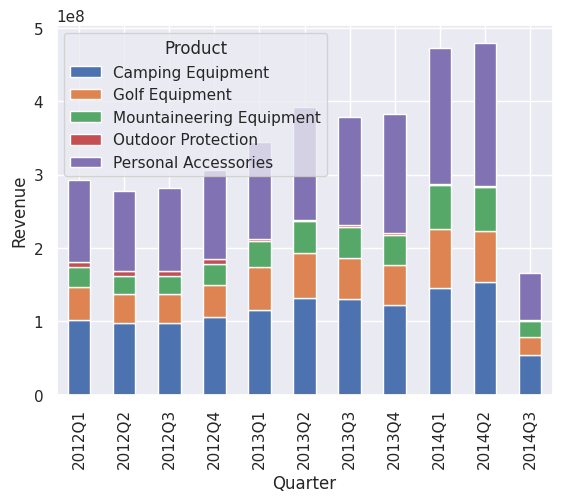

In [34]:
PQR_pivot1.plot.bar(stacked=True)
plt.ylabel('Revenue');

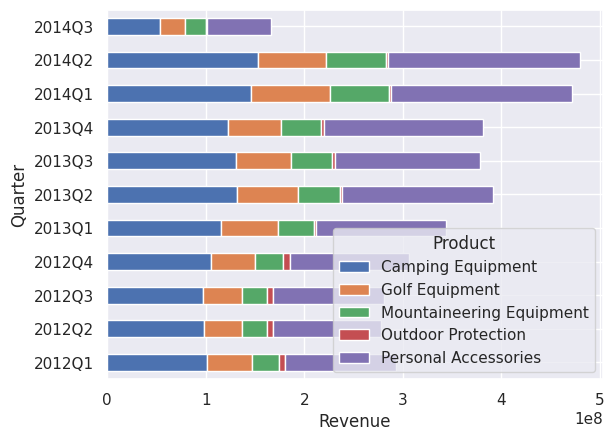

In [35]:
PQR_pivot1.plot.barh(stacked=True)
plt.xlabel('Revenue');

##change size of figure

In [36]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 10

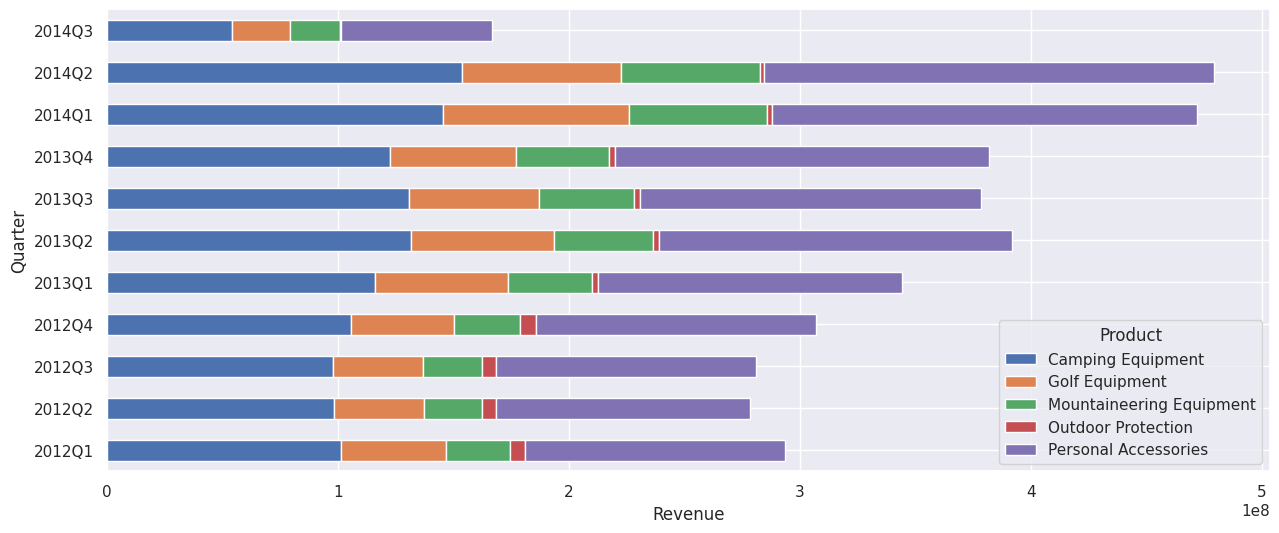

In [37]:
PQR_pivot1.plot.barh(stacked=True,figsize=(15, 6),)
plt.xlabel('Revenue');

In [38]:
PQR_pivot2 = pd.pivot_table(PQR_df,'Revenue',index="Product",columns='Quarter')
PQR_pivot2

Quarter,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3
Product,,,,,,,,,,,
Camping Equipment,42545.57,37065.22,38931.59,46560.45,50369.80,56272.24,55215.29,54465.77,63260.93,62846.40,50552.28
Golf Equipment,54268.37,51322.07,51694.10,63720.71,69080.18,86550.98,82534.18,88165.34,97022.64,103883.13,67735.17
Mountaineering Equipment,33985.56,31636.62,29495.03,36879.03,54700.21,60890.61,57164.60,60076.53,85140.99,83496.04,43269.05
Outdoor Protection,7671.35,7547.17,7351.28,8678.52,2551.80,3232.60,3051.98,3545.97,2052.09,2485.43,1926.21
Personal Accessories,29971.80,28826.50,31303.17,33269.48,35571.12,41658.42,38399.35,45322.42,50590.98,54787.04,26054.29


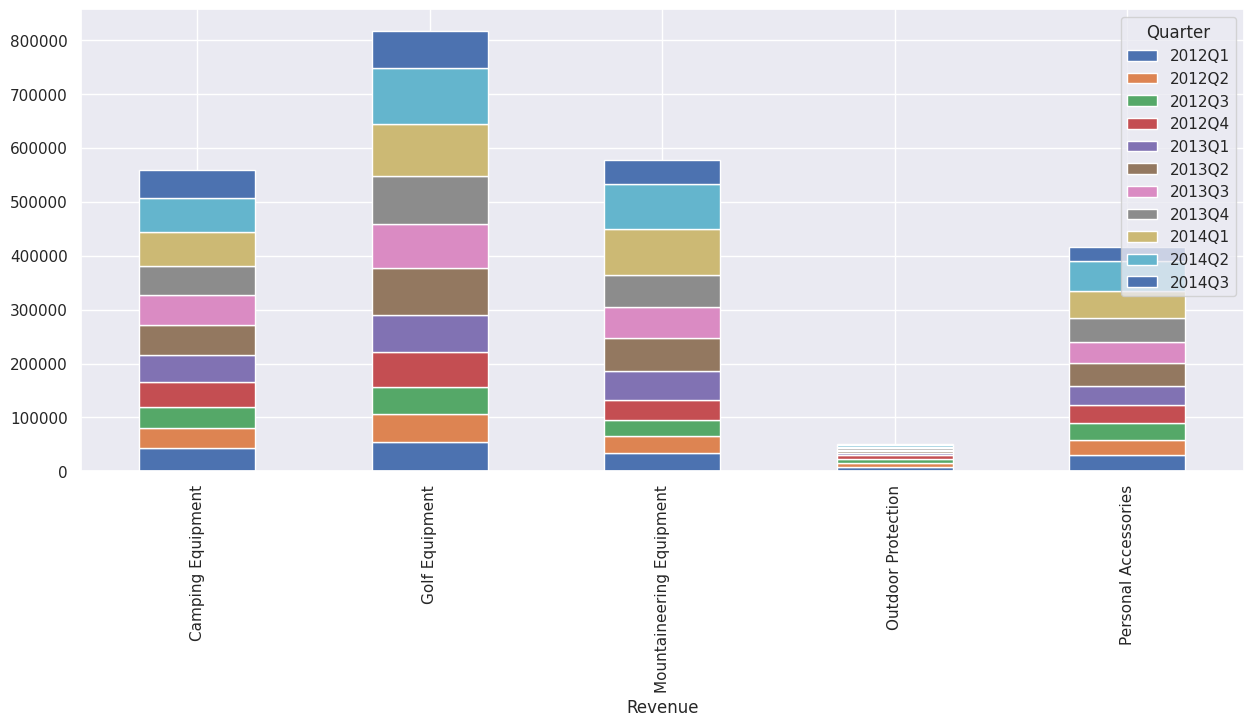

In [39]:
PQR_pivot2.plot.bar(stacked=True,figsize=(15, 6),)
plt.xlabel('Revenue');

#Cross Tab
https://pbpython.com/pandas-crosstab.html

In [40]:
PQR_CrossTab = pd.crosstab(PQR_df.Quarter,PQR_df.Product)
PQR_CrossTab

Product,Camping Equipment,Golf Equipment,Mountaineering Equipment,Outdoor Protection,Personal Accessories
Quarter,,,,,
2012Q1,2381,840,806,835,3755
2012Q2,2649,756,804,782,3811
2012Q3,2510,756,866,814,3602
2012Q4,2267,699,779,774,3642
2013Q1,2300,834,668,941,3703
2013Q2,2336,716,701,814,3676
2013Q3,2368,679,725,859,3835
2013Q4,2246,618,672,760,3572
2014Q1,2300,830,702,915,3636


In [41]:
PQR_CrossTab = pd.crosstab(PQR_df.Quarter,PQR_df.Product, margins=True)
PQR_CrossTab

Product,Camping Equipment,Golf Equipment,Mountaineering Equipment,Outdoor Protection,Personal Accessories,All
Quarter,,,,,,
2012Q1,2381,840,806,835,3755,8617
2012Q2,2649,756,804,782,3811,8802
2012Q3,2510,756,866,814,3602,8548
2012Q4,2267,699,779,774,3642,8161
2013Q1,2300,834,668,941,3703,8446
2013Q2,2336,716,701,814,3676,8243
2013Q3,2368,679,725,859,3835,8466
2013Q4,2246,618,672,760,3572,7868
2014Q1,2300,830,702,915,3636,8383


In [42]:
PQR_CrossTab = pd.crosstab(PQR_df.Quarter,PQR_df.Product, margins=True,margins_name="Total")
PQR_CrossTab

Product,Camping Equipment,Golf Equipment,Mountaineering Equipment,Outdoor Protection,Personal Accessories,Total
Quarter,,,,,,
2012Q1,2381,840,806,835,3755,8617
2012Q2,2649,756,804,782,3811,8802
2012Q3,2510,756,866,814,3602,8548
2012Q4,2267,699,779,774,3642,8161
2013Q1,2300,834,668,941,3703,8446
2013Q2,2336,716,701,814,3676,8243
2013Q3,2368,679,725,859,3835,8466
2013Q4,2246,618,672,760,3572,7868
2014Q1,2300,830,702,915,3636,8383


<Axes: xlabel='Product', ylabel='Quarter'>

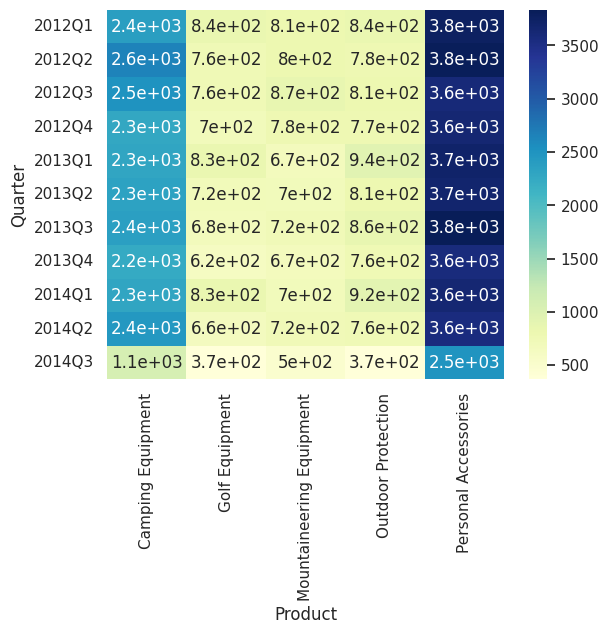

In [43]:
PQR_CrossTab2 = pd.crosstab(PQR_df.Quarter,PQR_df.Product)
sns.heatmap(PQR_CrossTab2,cmap="YlGnBu", annot=True, cbar=True)

In [44]:
#https://www.google.com/search?q=how+to+change+pandas+data+to+from+exponential+notation+to+numeric&oq=how+to+change+pandas+data+to+from+exponential+notation+to+numeric&aqs=chrome..69i57.18273j0j1&sourceid=chrome&ie=UTF-8
#https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc = {'figure.figsize':(15,8)})

<Axes: xlabel='Product', ylabel='Quarter'>

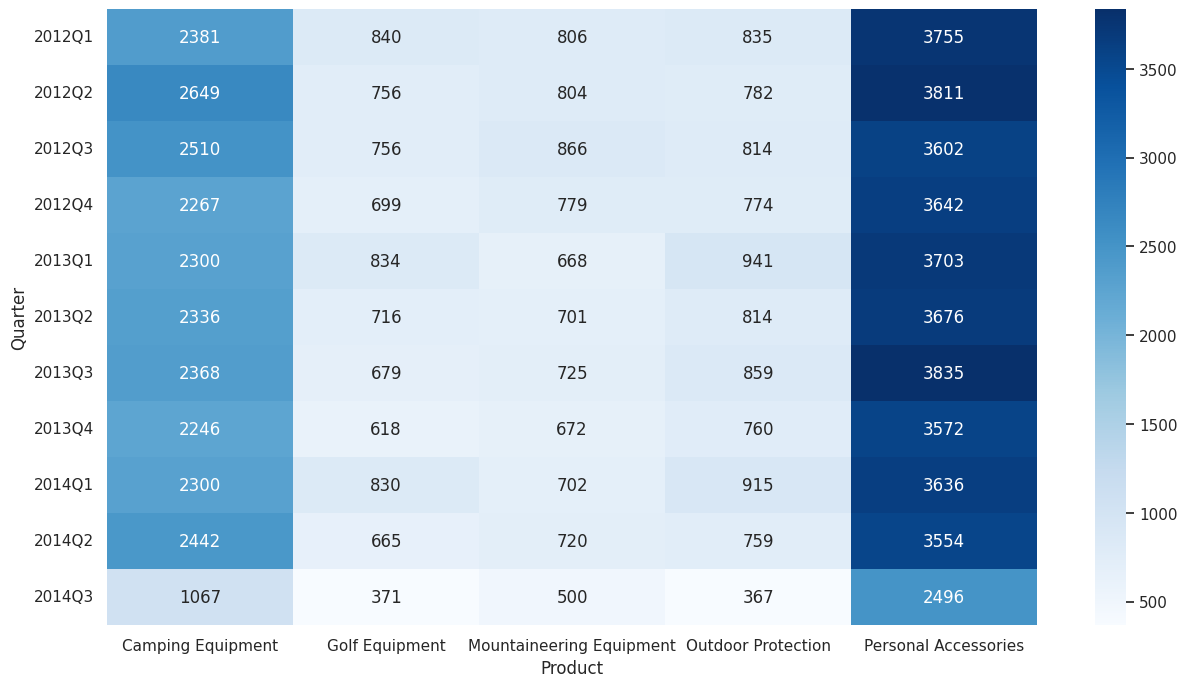

In [45]:
#https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
sns.heatmap(PQR_CrossTab2,cmap="Blues", annot=True, cbar=True, fmt='g')

In [46]:
from datetime import datetime
import pytz
print('signed off at  ',datetime.now(pytz.timezone('Asia/Kolkata')))

signed off at   2024-01-14 21:12:57.852506+05:30


#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)